# **Sales Prediction with XGBoost**
## **By: Arsh Vohra**
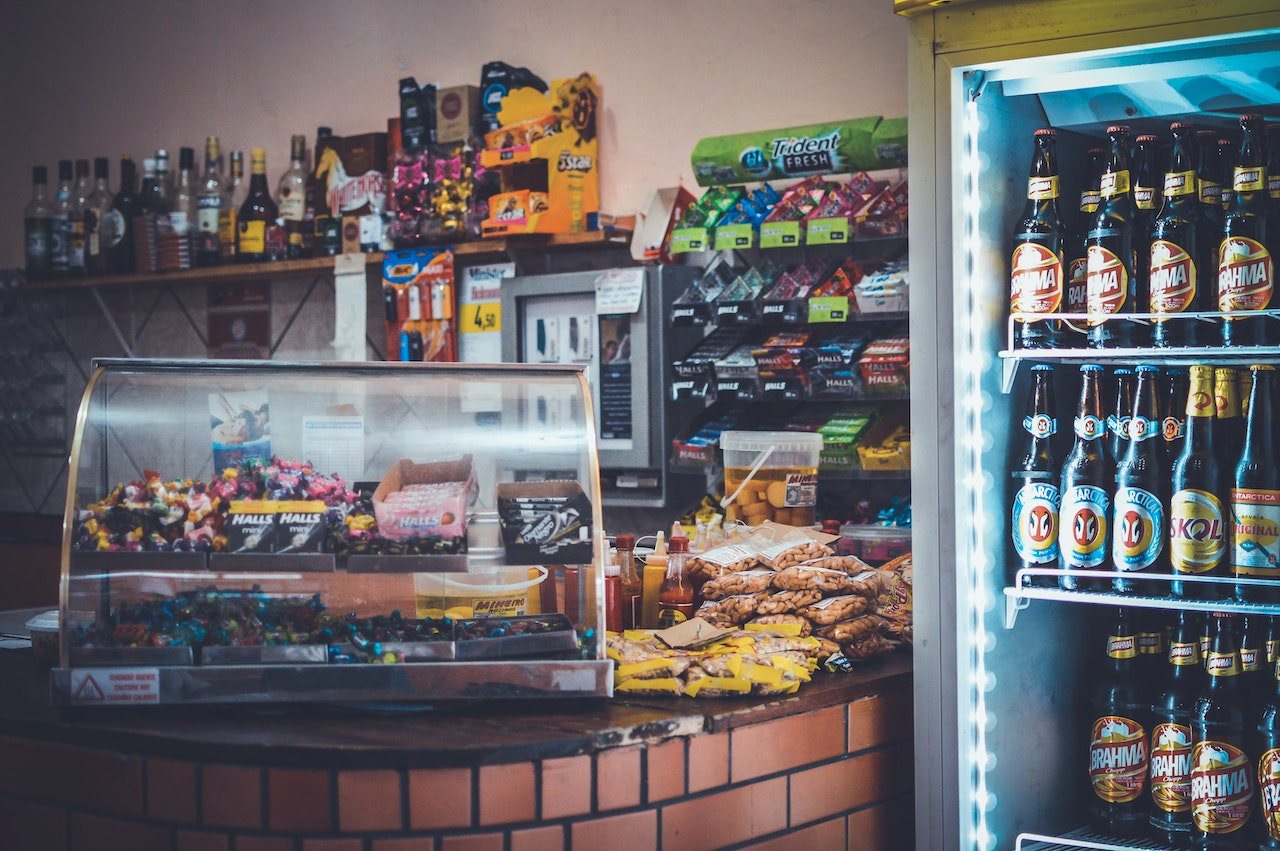

### Description:
**This project aims to predict sales for the Rossman stores using a machine learning model based on XGBoost algorithm. The Rossman dataset consists of historical sales data along with additional features such as store information, promotions, and competition. By leveraging the power of XGBoost, a powerful gradient boosting algorithm, we trained a model to forecast future sales accurately.**


**The project involves data preprocessing, feature engineering, model training, and evaluation. We assess the model's performance using metrics such as accuracy, root mean squared error (RMSE), and other relevant evaluation metrics. By comparing the predicted sales with the actual sales, we can determine the effectiveness of the model in capturing the underlying patterns and making accurate predictions.**

In [1]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
from matplotlib.pylab import rcParams
matplotlib.rcParams['figure.facecolor']='#00000000'
from xgboost import plot_tree

In [2]:
url = 'https://www.kaggle.com/c/rossmann-store-sales'
od.download(url)

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [3]:
os.listdir('./rossmann-store-sales/')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [4]:
train_df = pd.read_csv('./rossmann-store-sales/train.csv')
train_df

C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\411071377.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./rossmann-store-sales/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
test_df = pd.read_csv("./rossmann-store-sales/test.csv")
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [6]:
store_df = pd.read_csv("./rossmann-store-sales/store.csv")
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
sample_submission_df = pd.read_csv("./rossmann-store-sales/sample_submission.csv")
sample_submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
merged_train_df = train_df.merge(store_df,how='left',on='Store')
merged_test_df = test_df.merge(store_df,how='left',on='Store')

In [9]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Date

In [11]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merged_train_df)
split_date(merged_test_df)

In [13]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


# Store Open/Closed

In [14]:
merged_train_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [15]:
merged_train_df = merged_train_df[merged_train_df.Open == 1]

# Competition

In [16]:
def comp_open(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:0 if x < 0 else x).fillna(0)

In [17]:
comp_open(merged_train_df)
comp_open(merged_test_df)

C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1054226530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1054226530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:0 if x < 0 else x).fillna(0)


In [18]:
merged_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


# Promotion

In [19]:
def promo_cols(df):
    #Month's Promo2 was Open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * 7 / 30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x:0 if x < 0 else x).fillna(0) * df['Promo2']
    #Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month,axis=1) * df['Promo2']
    
def check_promo_month(df):
    month2num = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (df['PromoInterval'] or '').split(',')
        if df['Promo2Open'] and month2num[df['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

In [20]:
promo_cols(merged_train_df)
promo_cols(merged_test_df)

C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\2989843167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * 7 / 30.5
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\2989843167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'] = df['Promo2Open'].map(lambda x:0 if x < 0 else x).fillna(0) * df['Promo2']
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\2989843167.py:6: SettingWithCopyWarning: 
A 

In [21]:
merged_train_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']]

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
0,2015-07-31,0,NaN,NaN,NaN,0.000000,0
1,2015-07-31,1,2010.0,13.0,"Jan,Apr,Jul,Oct",64.131148,1
2,2015-07-31,1,2011.0,14.0,"Jan,Apr,Jul,Oct",51.901639,1
3,2015-07-31,0,NaN,NaN,NaN,0.000000,0
4,2015-07-31,0,NaN,NaN,NaN,0.000000,0
...,...,...,...,...,...,...,...
1016776,2013-01-01,0,NaN,NaN,NaN,0.000000,0
1016827,2013-01-01,0,NaN,NaN,NaN,0.000000,0
1016863,2013-01-01,1,2012.0,48.0,"Jan,Apr,Jul,Oct",1.213115,1
1017042,2013-01-01,0,NaN,NaN,NaN,0.000000,0


# Inputs/Target cols

In [22]:
merged_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [23]:
input_cols = ['Store','DayOfWeek','Open','Promo','StateHoliday', 'SchoolHoliday',
              'StoreType', 'Assortment','CompetitionDistance','Promo2','Year', 'Month', 'Day',
                'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [24]:
inputs = merged_train_df[input_cols]
targets = merged_train_df[target_col]
test_inputs = merged_test_df[input_cols]

In [27]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [28]:
inputs[numeric_cols].isna().sum()/len(inputs)

Store                  0.000000
Promo                  0.000000
SchoolHoliday          0.000000
CompetitionDistance    0.002589
CompetitionOpen        0.000000
Promo2                 0.000000
Promo2Open             0.000000
IsPromo2Month          0.000000
Day                    0.000000
Month                  0.000000
Year                   0.000000
WeekOfYear             0.000000
dtype: float64

In [29]:
test_inputs[numeric_cols].isna().sum()/len(test_inputs)

Store                  0.000000
Promo                  0.000000
SchoolHoliday          0.000000
CompetitionDistance    0.002336
CompetitionOpen        0.000000
Promo2                 0.000000
Promo2Open             0.000000
IsPromo2Month          0.000000
Day                    0.000000
Month                  0.000000
Year                   0.000000
WeekOfYear             0.000000
dtype: float64

In [30]:
max_distance = inputs.CompetitionDistance.max() +10000
inputs['CompetitionDistance'].fillna(max_distance,inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance,inplace = True)

C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\3143785973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['CompetitionDistance'].fillna(max_distance,inplace = True)
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\3143785973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['CompetitionDistance'].fillna(max_distance,inplace = True)


### Scale Numeric Values

In [31]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [32]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1486796519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1486796519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [33]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs[categorical_cols].astype(str))
encoded_col = list(encoder.get_feature_names_out())
inputs[encoded_col] =encoder.transform(inputs[categorical_cols].astype(str))
test_inputs[encoded_col] = encoder.transform(test_inputs[categorical_cols].astype(str))

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1589180093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[encoded_col] =encoder.transform(inputs[categorical_cols].astype(str))
C:\Users\Arsh\AppData\Local\Temp\ipykernel_7336\1589180093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

# Training

In [34]:
train = inputs[numeric_cols+encoded_col]
test = test_inputs[numeric_cols+encoded_col]

In [35]:
train_input,val_input,train_targets,val_target = train_test_split(train,targets,random_state=42,train_size=0.9)

In [81]:
model = XGBRegressor(random_state=42,n_jobs=-1,max_depth=4,n_estimators=100,learning_rate=0.9)

In [82]:
%%time
model.fit(train_input,train_targets)

CPU times: total: 3min 45s
Wall time: 20.3 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [38]:
def rmse(y_true,y_pred):
    rmse = mean_squared_error(y_true,y_pred,squared=False)
    return rmse

In [39]:
print("Accuracy on Training data is :{}".format(model.score(train_input,train_targets)))
print("Accuracy on Validation data is :{}".format(model.score(val_input,val_target)))
print("RMSE on Train data is :{}".format(rmse(train_targets,model.predict(train_input))))
print("RMSE on Validation data is :{}".format(rmse(val_target,model.predict(val_input))))

Accuracy on Training data is :0.8282458554895291
Accuracy on Validation data is :0.8281939744915858
RMSE on Train data is :1285.9823550019273
RMSE on Validation data is :1291.205698418609


### Feature Importance

In [40]:
importance_df = pd.DataFrame({
    "Feature":train_input.columns,
    "Importance":model.feature_importances_
})
importance_df.sort_values('Importance',ascending=False).head(10)

,Feature,Importance
24,StoreType_b,0.129958
1,Promo,0.125489
12,DayOfWeek_1,0.116679
5,Promo2,0.087577
9,Month,0.046769
27,Assortment_a,0.046381
0,Store,0.041926
29,Assortment_c,0.041896
23,StoreType_a,0.040019
25,StoreType_c,0.038125


In [56]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.rcParams['figure.dpi']=300
plt.title('Feature Importance')
sns.barplot(data=importance_df.sort_values('Importance',ascending=False).head(10),x='Importance',y='Feature')

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

### Visualization

<Axes: >

<Figure size 9000x1500 with 0 Axes>

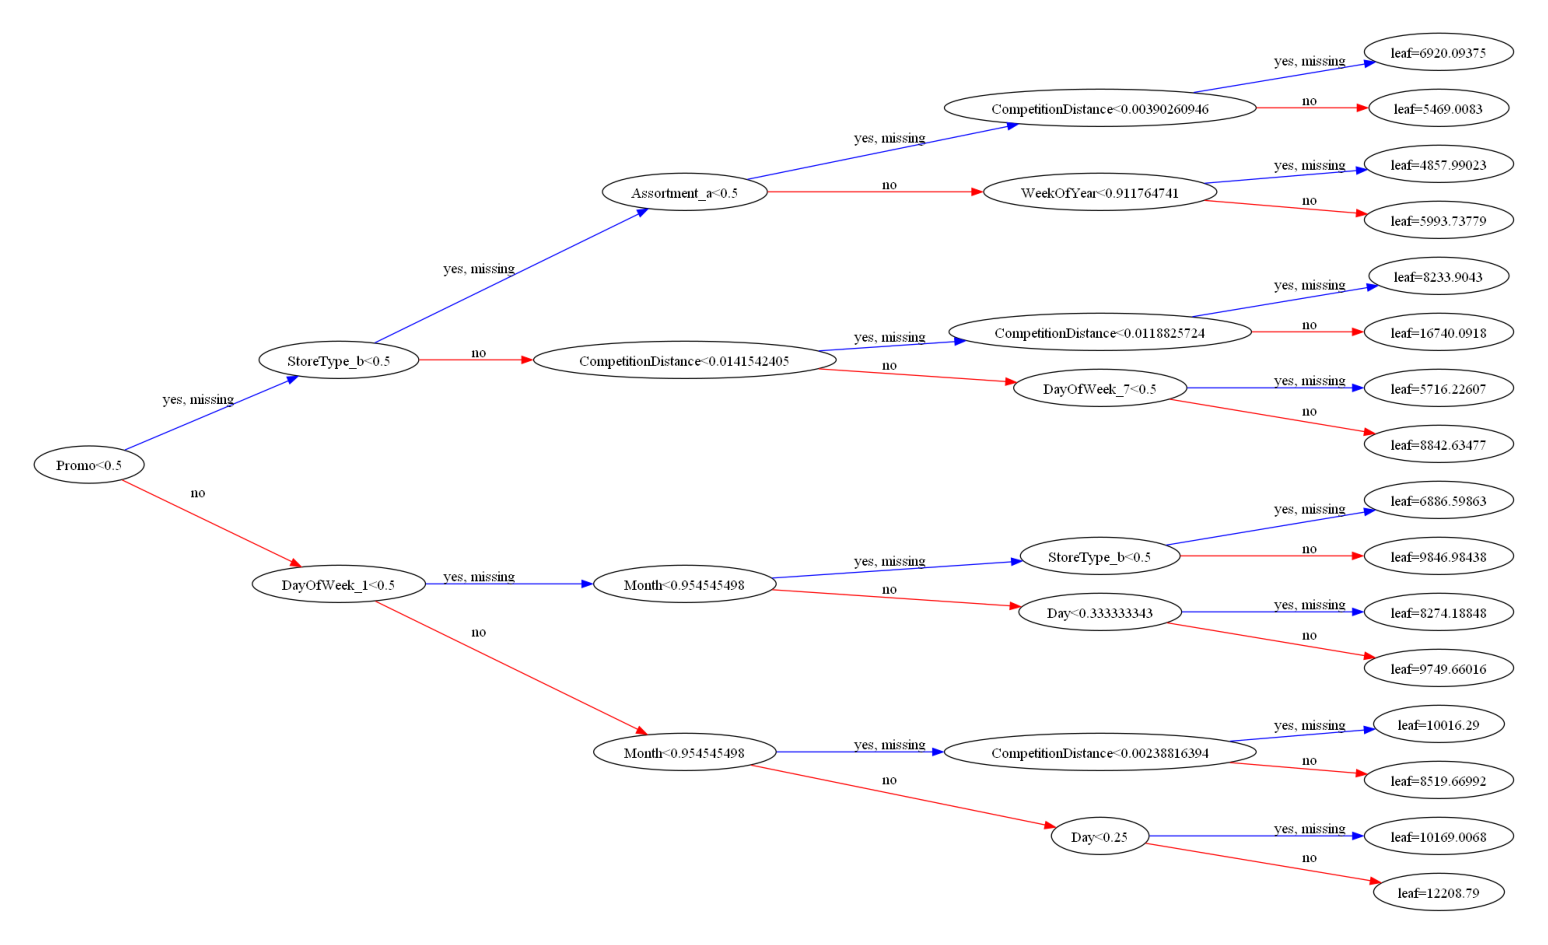

In [83]:
plt.figure(figsize=(30,5))
plt.rcParams['figure.dpi']=300
plt.rcParams['font.size'] =10
plot_tree(model,rankdir='LR',num_trees=0)

<Axes: >

<Figure size 9000x1500 with 0 Axes>

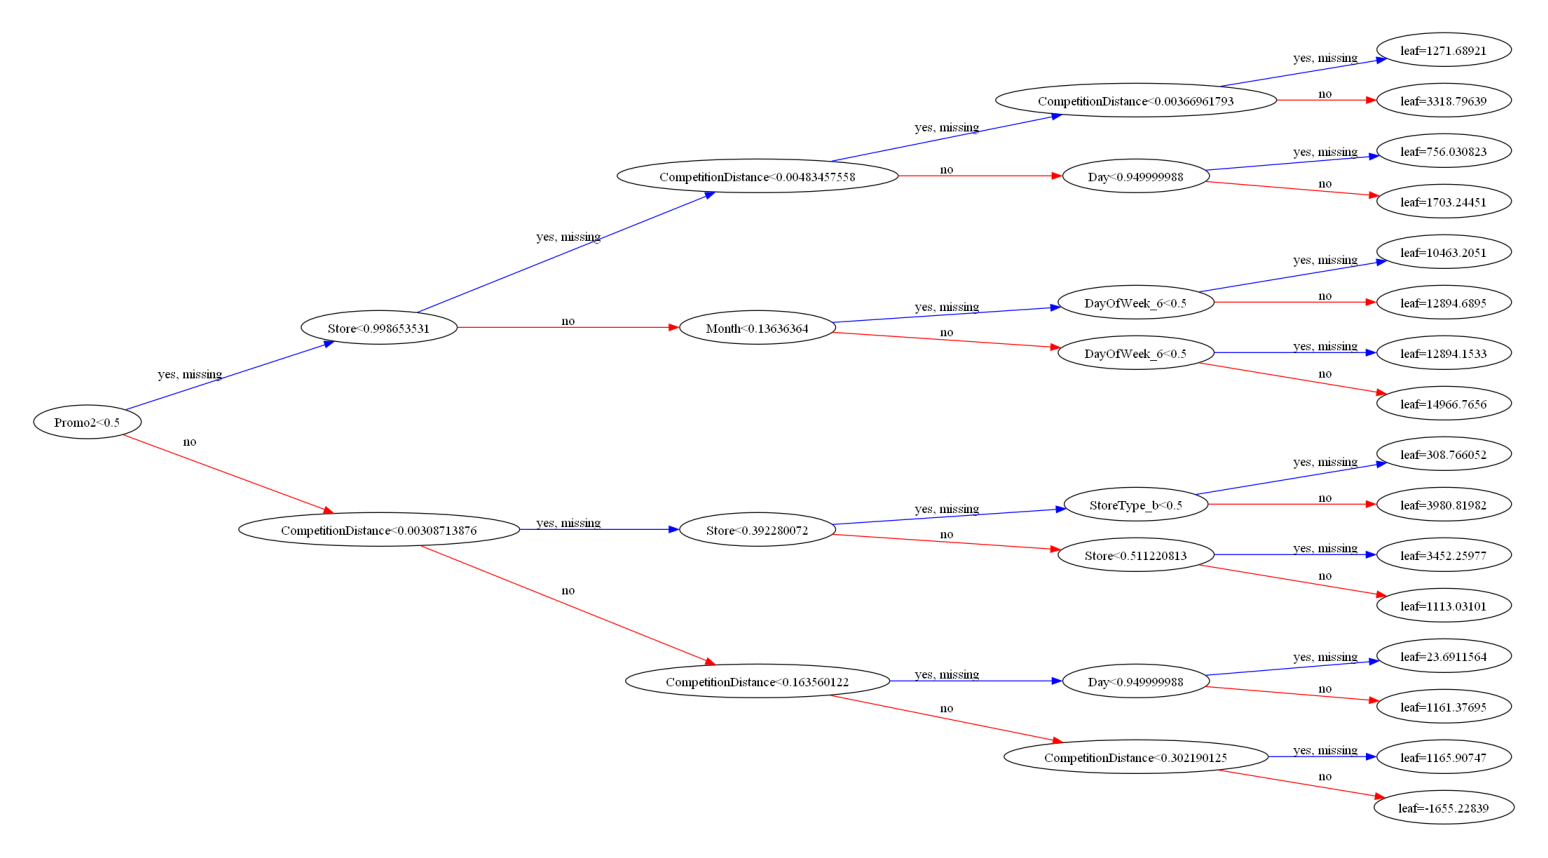

In [86]:
plt.figure(figsize=(30,5))
plot_tree(model,num_trees=1,rankdir='LR')

# Hyperparameter Tuning

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [43]:
def test_Parameters(**params):
    model = XGBRegressor(random_state=42,n_jobs=-1,**params)
    model.fit(train_input,train_targets)
    print("Accuracy on Training data is :{}".format(model.score(train_input,train_targets)))
    print("Accuracy on Validation data is :{}".format(model.score(val_input,val_target)))
    print("RMSE on Train data is :{}".format(rmse(train_targets,model.predict(train_input))))
    print("RMSE on Validation data is :{}".format(rmse(val_target,model.predict(val_input))))

### n_estimators
The number of trees to be created. More trees = greater capacity of the model.

In [44]:
test_Parameters(n_estimators=10)

Accuracy on Training data is :0.4261534798580082
Accuracy on Validation data is :0.4244643920006793
RMSE on Train data is :2350.602929448003
RMSE on Validation data is :2363.2645347471403


In [57]:
test_Parameters(n_estimators = 500)

Accuracy on Training data is :0.9408092938413584
Accuracy on Validation data is :0.9358399755563364
RMSE on Train data is :754.9325612621253
RMSE on Validation data is :789.0572214049414


In [58]:
test_Parameters(n_estimators = 600)

Accuracy on Training data is :0.9449857218474867
Accuracy on Validation data is :0.9392395715694567
RMSE on Train data is :727.8118231385998
RMSE on Validation data is :767.8681466479311


### max_depth
As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [59]:
test_Parameters(max_depth=2)

Accuracy on Training data is :0.4243381081313744
Accuracy on Validation data is :0.4264939688011611
RMSE on Train data is :2354.3180766391038
RMSE on Validation data is :2359.0939301613043


In [60]:
test_Parameters(max_depth=20)

Accuracy on Training data is :0.9994671118206067
Accuracy on Validation data is :0.924335108001421
RMSE on Train data is :71.6307404078704
RMSE on Validation data is :856.886788092201


In [61]:
test_Parameters(max_depth=10)

Accuracy on Training data is :0.9469961177421118
Accuracy on Validation data is :0.933141395957061
RMSE on Train data is :714.3897869203433
RMSE on Validation data is :805.4802399371313


### learning_rate
The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [62]:
test_Parameters(n_estimators=50, learning_rate=0.01)

Accuracy on Training data is :-1.640510582785586
Accuracy on Validation data is :-1.6317293930813732
RMSE on Train data is :5042.261359773146
RMSE on Validation data is :5053.553339384733


In [63]:
test_Parameters(n_estimators=100, learning_rate=0.2)

Accuracy on Training data is :0.792789832289126
Accuracy on Validation data is :0.7904272569239024
RMSE on Train data is :1412.4950286849257
RMSE on Validation data is :1426.0791732057598


In [64]:
test_Parameters(n_estimators=100, learning_rate=0.3)

Accuracy on Training data is :0.8560071948867976
Accuracy on Validation data is :0.8539038108875191
RMSE on Train data is :1177.4752656409355
RMSE on Validation data is :1190.6817093300076


In [65]:
test_Parameters(n_estimators=100, learning_rate=0.9)

Accuracy on Training data is :0.9086401737666862
Accuracy on Validation data is :0.9050349686081892
RMSE on Train data is :937.9053848417252
RMSE on Validation data is :959.9709624157325


In [66]:
test_Parameters(n_estimators=100, learning_rate=0.99)

Accuracy on Training data is :0.9054621450902621
Accuracy on Validation data is :0.9005826179653599
RMSE on Train data is :954.078850547986
RMSE on Validation data is :982.2168942522989


### booster

In [67]:
test_Parameters(booster='gblinear',n_estimators=100, learning_rate=0.3)

Accuracy on Training data is :0.2282946381158787
Accuracy on Validation data is :0.22935494064281137
RMSE on Train data is :2725.882652213802
RMSE on Validation data is :2734.6606262487294


## Trying Different Models

In [68]:
test_Parameters(n_estimators=1000,learning_rate=0.2, max_depth=10,)

Accuracy on Training data is :0.9860814248618736
Accuracy on Validation data is :0.95630006964644
RMSE on Train data is :366.0823460771611
RMSE on Validation data is :651.2033272494981


In [69]:
test_Parameters(n_estimators=1000,learning_rate=0.4, max_depth=10)

Accuracy on Training data is :0.9925393746107148
Accuracy on Validation data is :0.9509624742279431
RMSE on Train data is :268.02111760756594
RMSE on Validation data is :689.8275152579633


In [70]:
test_Parameters(n_estimators=1000,learning_rate=0.3, max_depth=7)

Accuracy on Training data is :0.9665016996920698
Accuracy on Validation data is :0.952967600371013
RMSE on Train data is :567.9273486081967
RMSE on Validation data is :675.5769245908139


In [71]:
test_Parameters(n_estimators=1000,learning_rate=0.5, max_depth=8)

Accuracy on Training data is :0.9805528213607115
Accuracy on Validation data is :0.9525351941898943
RMSE on Train data is :432.7227203382958
RMSE on Validation data is :678.6753767011945


In [72]:
%%time
#Training final model
model = XGBRegressor(random_state=42,n_jobs=-1,n_estimators=1000,learning_rate=0.3, max_depth=7)
model.fit(train,targets)

CPU times: total: 1h 1min 13s
Wall time: 5min 27s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [73]:
print("Accuracy on Training data is :{}".format(model.score(train,targets)))
print("RMSE on Train data is :{}".format(rmse(targets,model.predict(train))))

Accuracy on Training data is :0.9657887652231386
RMSE on Train data is :574.1638772299133


In [74]:
test_pred = model.predict(test)
sample_submission_df['Sales'] = test_pred

In [75]:
sample_submission_df['Sales'] = sample_submission_df['Sales'] * test_df.Open.fillna(1)

In [76]:
sample_submission_df.to_csv('submission.csv',index=None)

# Single Input

In [77]:
def single_input(dirctory):
    single_df = pd.DataFrame([dirctory])
    merged_single_df = single_df.merge(store_df,on='Store')
    split_date(merged_single_df)
    comp_open(merged_single_df)
    promo_cols(merged_single_df)
    merged_single_df[numeric_cols] = scaler.transform(merged_single_df[numeric_cols])
    merged_single_df[encoded_col] = encoder.transform(merged_single_df[categorical_cols].astype(str))
    input_df = merged_single_df[numeric_cols+encoded_col]
    pred = model.predict(input_df)[0]
    return pred

In [78]:
input_data = ({
    'Store':2,
    'DayOfWeek':5,
    'Date':'2015-07-31',
    'Open':1,
    'Promo':1,
    'StateHoliday':1,
    'SchoolHoliday':1
})               

In [79]:
single_input(input_data)

3541.617